Find some documentation about sparse subsetting [here](https://toolbox-docs.marine.copernicus.eu/en/v2.1.0b1/usage/subset-usage.html#sparse-data-subsetting).  


Disclaimer: INSITU datasets are sparse and hence the possible extent of the request can be huge even for a few data. Please be mindful of restricting the area of the request (on all dimensions). 

In [4]:
import copernicusmarine
# version should be 2.1.0b1 if not maybe it's necessary to reload the python kernel
copernicusmarine.__version__

'2.1.2'

In [5]:
import pandas as pd

The whole subsetting should work the same as subsetting gridded datasets. The result is different as it comes as a CSV, pandas.DataFrame or Parquet file. You can read more about it in [the documentation](https://toolbox-docs.marine.copernicus.eu/en/v2.1.0b1/usage/subset-usage.html#sparse-data-subsetting).

In [9]:
dataset_insitu = "cmems_obs-ins_arc_phybgcwav_mynrt_na_irr"
# subset, save locally
response = copernicusmarine.subset(
      dataset_id=dataset_insitu,
      minimum_latitude=60,
      maximum_latitude=90,
      minimum_longitude=-170,
      maximum_longitude=170,
      minimum_depth=0,
      maximum_depth=20,
      variables=["TEMP"],
      start_datetime="2025-05-01T00:00:00",
      end_datetime="2025-06-01T03:00:00",
      dataset_part="latest"
)

INFO - 2025-06-02T12:07:44Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  ldrouineau


Copernicus Marine password:

  ········


INFO - 2025-06-02T12:07:51Z - Selected dataset version: "202311"
INFO - 2025-06-02T12:07:51Z - Selected dataset part: "latest"
WARNING - 2025-06-02T12:07:51Z - Some of your subset selection [2025-05-01 00:00:00+00:00, 2025-06-01 03:00:00+00:00] for the time dimension exceed the dataset coordinates [2025-05-03 00:00:00+00:00, 2025-06-02 10:40:00+00:00]


In [32]:
# and open
df = pd.read_csv(response.file_path)
df['time'] = pd.to_datetime(df['time'].values)
df.head(10)

,variable,platform_id,platform_type,time,longitude,latitude,depth,pressure,is_depth_from_producer,value,value_qc,institution,doi,product_doi
0,TEMP,1301800,DB,2025-05-03 01:00:00+00:00,18.0672,70.6140,0.5,NaN,1,6.14,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
1,TEMP,1301800,DB,2025-05-03 02:00:00+00:00,18.0844,70.6326,0.5,NaN,1,6.12,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
2,TEMP,1301800,DB,2025-05-03 03:00:00+00:00,18.0804,70.6462,0.5,NaN,1,6.13,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
3,TEMP,1301800,DB,2025-05-03 04:00:00+00:00,18.0610,70.6550,0.5,NaN,1,6.12,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
4,TEMP,1301800,DB,2025-05-03 05:00:00+00:00,18.0252,70.6558,0.5,NaN,1,6.11,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
5,TEMP,1301800,DB,2025-05-03 06:00:00+00:00,17.9772,70.6432,0.5,NaN,1,6.31,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
6,TEMP,1301800,DB,2025-05-03 07:00:00+00:00,17.9380,70.6298,0.5,NaN,1,6.43,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
7,TEMP,1301800,DB,2025-05-03 08:00:00+00:00,17.8986,70.6136,0.5,NaN,1,6.44,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
8,TEMP,1301800,DB,2025-05-03 09:00:00+00:00,17.8518,70.5992,0.5,NaN,1,6.51,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
9,TEMP,1301800,DB,2025-05-03 10:00:00+00:00,17.8044,70.5860,0.5,NaN,1,6.49,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031


In [33]:
df_DB = df[df['platform_type'] == 'DB']

In [34]:
len(df_DB)

75632

In [35]:
df_DB_low_temp = df_DB[(df_DB['value'] < -2.0) & (df_DB['value_qc'] != 4)]

In [36]:
len(df_DB_low_temp)

784

In [37]:
print(sorted(df_DB_low_temp['platform_id'].unique()))

['6203662', '6203666', '6203668', '6301583', '6301586', '6301587']


In [67]:
df_DB_low_temp

,variable,platform_id,platform_type,time,longitude,latitude,depth,pressure,is_depth_from_producer,value,value_qc,institution,doi,product_doi
44514,TEMP,6203662,DB,2025-05-14 00:00:00+00:00,-0.9438,81.8891,0.5,NaN,1,-2.50,1,EIG EUMETNET,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
44515,TEMP,6203662,DB,2025-05-14 01:00:00+00:00,-0.9361,81.8851,0.5,NaN,1,-2.50,1,EIG EUMETNET,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
44516,TEMP,6203662,DB,2025-05-14 02:00:00+00:00,-0.9282,81.8814,0.5,NaN,1,-2.50,1,EIG EUMETNET,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
44518,TEMP,6203662,DB,2025-05-14 04:00:00+00:00,-0.9213,81.8741,0.5,NaN,1,-2.48,1,EIG EUMETNET,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
44519,TEMP,6203662,DB,2025-05-14 05:00:00+00:00,-0.9232,81.8702,0.5,NaN,1,-2.48,1,EIG EUMETNET,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69373,TEMP,6301587,DB,2025-05-31 23:00:00+00:00,-108.4970,86.3498,0.5,NaN,1,-2.36,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
69374,TEMP,6301587,DB,2025-06-01 00:00:00+00:00,-108.5724,86.3495,0.5,NaN,1,-2.34,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
69375,TEMP,6301587,DB,2025-06-01 01:00:00+00:00,-108.6329,86.3490,0.5,NaN,1,-2.31,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031
69376,TEMP,6301587,DB,2025-06-01 02:00:00+00:00,-108.6795,86.3484,0.5,NaN,1,-2.28,1,Unknown institution,https://doi.org/10.13155/59938 https://doi.org...,https://doi.org/10.48670/moi-00031


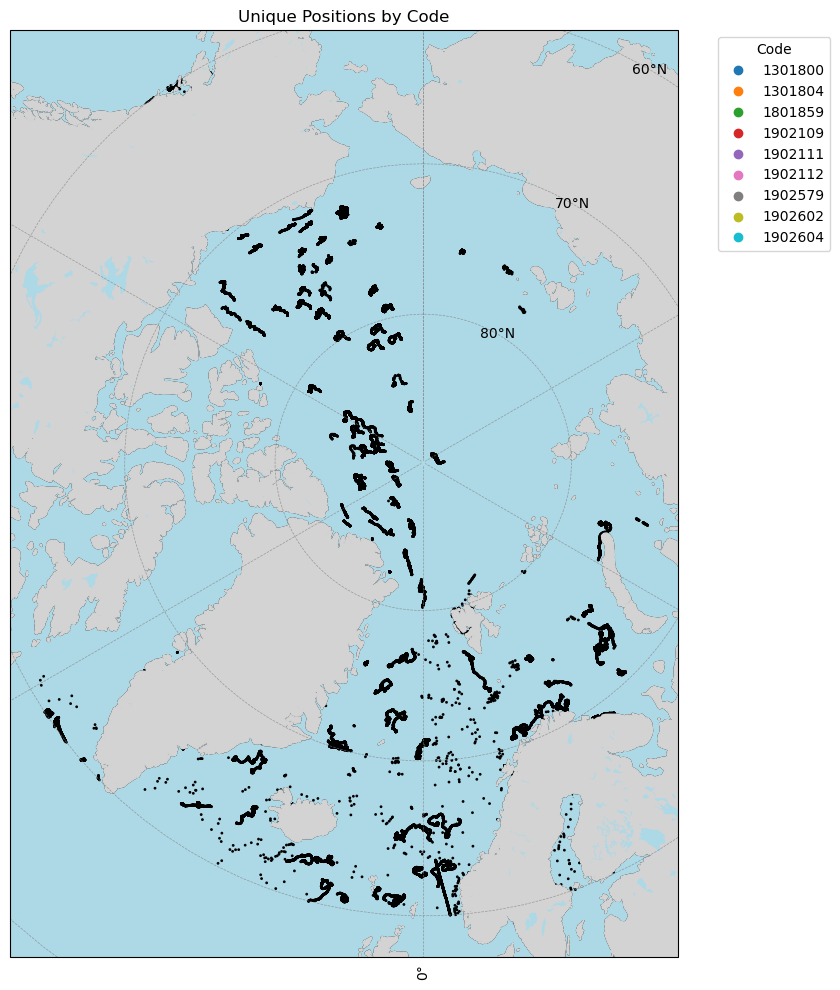

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

# Example dataframe
# Remove duplicates on 'code', 'latitude', 'longitude'
unique_locs = df.drop_duplicates(subset=['platform_id', 'latitude', 'longitude'])

# Plot with Cartopy
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
land_50m = NaturalEarthFeature('physical', 'land', '50m',
                               edgecolor='face',
                               facecolor='lightgray')

ax.add_feature(land_50m)
#ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
#ax.add_feature(cfeature.RIVERS)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Scatter plot with color by 'code'
scatter = ax.scatter(
    unique_locs['longitude'],
    unique_locs['latitude'],
    c=unique_locs['platform_id'].astype('category').cat.codes,  # color by code
    cmap='tab10',  # use a categorical colormap
    s=1,
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Create legend with actual code names
handles, _ = scatter.legend_elements(prop="colors")
labels = unique_locs['platform_id'].astype('category').cat.categories
ax.legend(handles, labels, title="Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Unique Positions by Code")
plt.tight_layout()
plt.show()

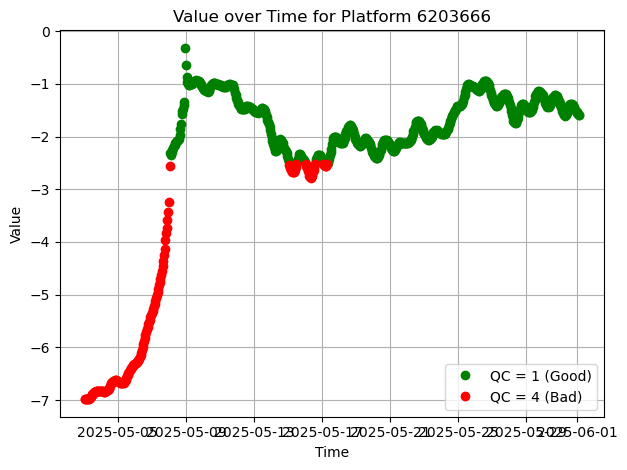

In [39]:
# Filter for a specific platform_id
platform = '6203666'  # Replace with your actual platform_id
df_platform = df_DB[df_DB['platform_id'] == platform]

# Create a figure
#plt.figure(figsize=(10, 6))
#plt.plot(df_platform['time'], df_platform['value'], 'go', label='QC = 1 (Good)')

# Plot values with QC = 1 (green)
df_good = df_platform[df_platform['value_qc'] == 1]
plt.plot(df_good['time'], df_good['value'], 'go', label='QC = 1 (Good)')

# Plot values with QC = 4 (red)
df_bad = df_platform[df_platform['value_qc'] == 4]
plt.plot(df_bad['time'], df_bad['value'], 'ro', label='QC = 4 (Bad)')

# Add labels and legend
plt.title(f'Value over Time for Platform {platform}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
import xarray as xr

ds = xr.open_dataset('db_6203666.nc')

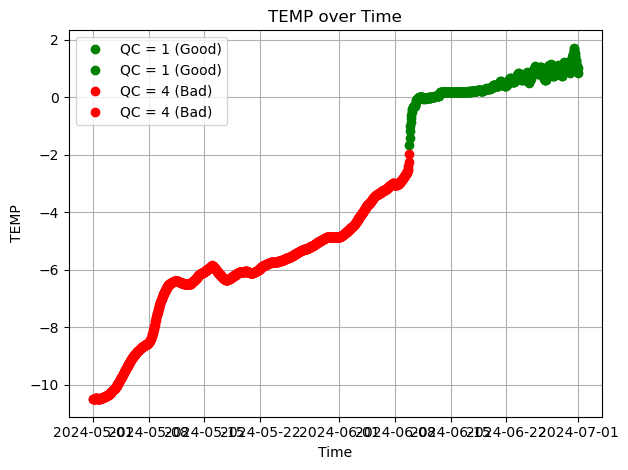

In [66]:
import numpy as np

# Extract TEMP and TEMP_QC as arrays
temp = ds['TEMP']
qc = ds['TEMP_QC']
time = ds['TIME']

# Convert date string to np.datetime64
time_threshold = np.datetime64('2024-05-01')
time_threshold_max = np.datetime64('2024-07-01')

# Apply time mask
time_mask = (time >= time_threshold) & (time <= time_threshold_max)

# Plot TEMP where QC == 1 (green)
temp_good = temp.where((qc == 1) & time_mask)
plt.plot(time, temp_good, 'go', label='QC = 1 (Good)')

# Plot TEMP where QC == 4 (red)
temp_bad = temp.where((qc == 4) & time_mask)
plt.plot(time, temp_bad, 'ro', label='QC = 4 (Bad)')

# Plot formatting
plt.title('TEMP over Time')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()